# Key Stoke Biometrics
## Goal is to identify a person based on the way they type
> The data consist of keystroke-timing information from 51 subjects (typists), each typing a password (.tie5Roanl) 400 times.

In [3]:
# conda install tensorflow

In [4]:
# conda install scikit-learn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('DSL-StrongPasswordData.csv')

In [6]:
df.head(100)

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,s002,2,46,0.1080,0.1758,0.0678,0.0932,0.1392,0.0460,0.0771,...,0.1180,0.1405,0.0225,0.0708,0.1901,0.1193,0.0826,0.2171,0.1345,0.0755
96,s002,2,47,0.1053,0.1715,0.0662,0.0839,0.1219,0.0380,0.0718,...,0.1220,0.1120,-0.0100,0.0723,0.1987,0.1264,0.0723,0.2337,0.1614,0.0942
97,s002,2,48,0.1059,0.1882,0.0823,0.0913,0.1309,0.0396,0.0718,...,0.0942,0.1051,0.0109,0.0686,0.2180,0.1494,0.0715,0.3572,0.2857,0.1069
98,s002,2,49,0.1262,0.2715,0.1453,0.0934,0.1744,0.0810,0.0721,...,0.1146,0.1279,0.0133,0.0639,0.1808,0.1169,0.0871,0.2192,0.1321,0.0821


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject          20400 non-null  object 
 1   sessionIndex     20400 non-null  int64  
 2   rep              20400 non-null  int64  
 3   H.period         20400 non-null  float64
 4   DD.period.t      20400 non-null  float64
 5   UD.period.t      20400 non-null  float64
 6   H.t              20400 non-null  float64
 7   DD.t.i           20400 non-null  float64
 8   UD.t.i           20400 non-null  float64
 9   H.i              20400 non-null  float64
 10  DD.i.e           20400 non-null  float64
 11  UD.i.e           20400 non-null  float64
 12  H.e              20400 non-null  float64
 13  DD.e.five        20400 non-null  float64
 14  UD.e.five        20400 non-null  float64
 15  H.five           20400 non-null  float64
 16  DD.five.Shift.r  20400 non-null  float64
 17  UD.five.Shif

# columns what do they mean?
- subject_id: the subject id (eg s002 or s057)
- not all subjects came for the session example s001 did not come so he/she is not included in dataset
- session_index is the session which the password was typed , person took breaks in between each session ranging from 1 to 8

## remaining are timing information
- rep is the repetition of the password typed in the session
- H.period: the duration where the period key was held down
- DD.period.t: the duration between pressing the period key and then pressing the t key
- UD.period.t: the duration between releasing the period key and then pressing the t key

# note
- UD can be negative if the user does not release the key before pressing the next key
- H + UD = DD

Consider the following one-line example of what you will see in the data:
  subject  sessionIndex  rep      H.period   DD.period.t   UD.period.t     ...
     s002             1    1        0.1491        0.3979        0.2488     ...
The example presents typing data for subject 2, session 1, repetition 1. The period key was held down for 0.1491 seconds (149.1 milliseconds); the time between pressing the period key and the t key (keydown-keydown time) was 0.3979 seconds; the time between releasing the period and pressing the t key (keyup-keydown time) was 0.2488 seconds; and so on.

In [8]:
df['subject'].unique()

array(['s002', 's003', 's004', 's005', 's007', 's008', 's010', 's011',
       's012', 's013', 's015', 's016', 's017', 's018', 's019', 's020',
       's021', 's022', 's024', 's025', 's026', 's027', 's028', 's029',
       's030', 's031', 's032', 's033', 's034', 's035', 's036', 's037',
       's038', 's039', 's040', 's041', 's042', 's043', 's044', 's046',
       's047', 's048', 's049', 's050', 's051', 's052', 's053', 's054',
       's055', 's056', 's057'], dtype=object)

In [9]:
# convert the subject column to a id column with numbers
df['subject'] = df['subject'].astype('category')
df['id'] = df['subject'].cat.codes



In [10]:
df.head(20)

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return,id
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742,0
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747,0
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945,0
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813,0
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818,0
5,s002,1,6,0.1394,0.2343,0.0949,0.0813,0.1299,0.0486,0.0744,...,0.1534,0.0262,0.0858,0.2528,0.1670,0.0792,0.2971,0.2179,0.0591,0
6,s002,1,7,0.1064,0.2069,0.1005,0.0866,0.1368,0.0502,0.0800,...,0.1204,-0.0114,0.0782,0.1999,0.1217,0.0879,0.2907,0.2028,0.0890,0
7,s002,1,8,0.0929,0.1810,0.0881,0.0818,0.1378,0.0560,0.0747,...,0.1040,-0.0282,0.0821,0.2127,0.1306,0.1006,0.2776,0.1770,0.0679,0
8,s002,1,9,0.0966,0.1797,0.0831,0.0771,0.1296,0.0525,0.0839,...,0.1403,0.0141,0.0787,0.2138,0.1351,0.0882,0.2868,0.1986,0.0634,0
9,s002,1,10,0.1093,0.1807,0.0714,0.0731,0.1457,0.0726,0.0766,...,0.1162,-0.0301,0.1207,0.2281,0.1074,0.1204,0.3187,0.1983,0.0866,0


In [11]:
df['id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int8)

In [12]:
df.columns

Index(['subject', 'sessionIndex', 'rep', 'H.period', 'DD.period.t',
       'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e',
       'H.e', 'DD.e.five', 'UD.e.five', 'H.five', 'DD.five.Shift.r',
       'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o',
       'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l',
       'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return', 'H.Return', 'id'],
      dtype='object')

In [18]:
df['id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int8)

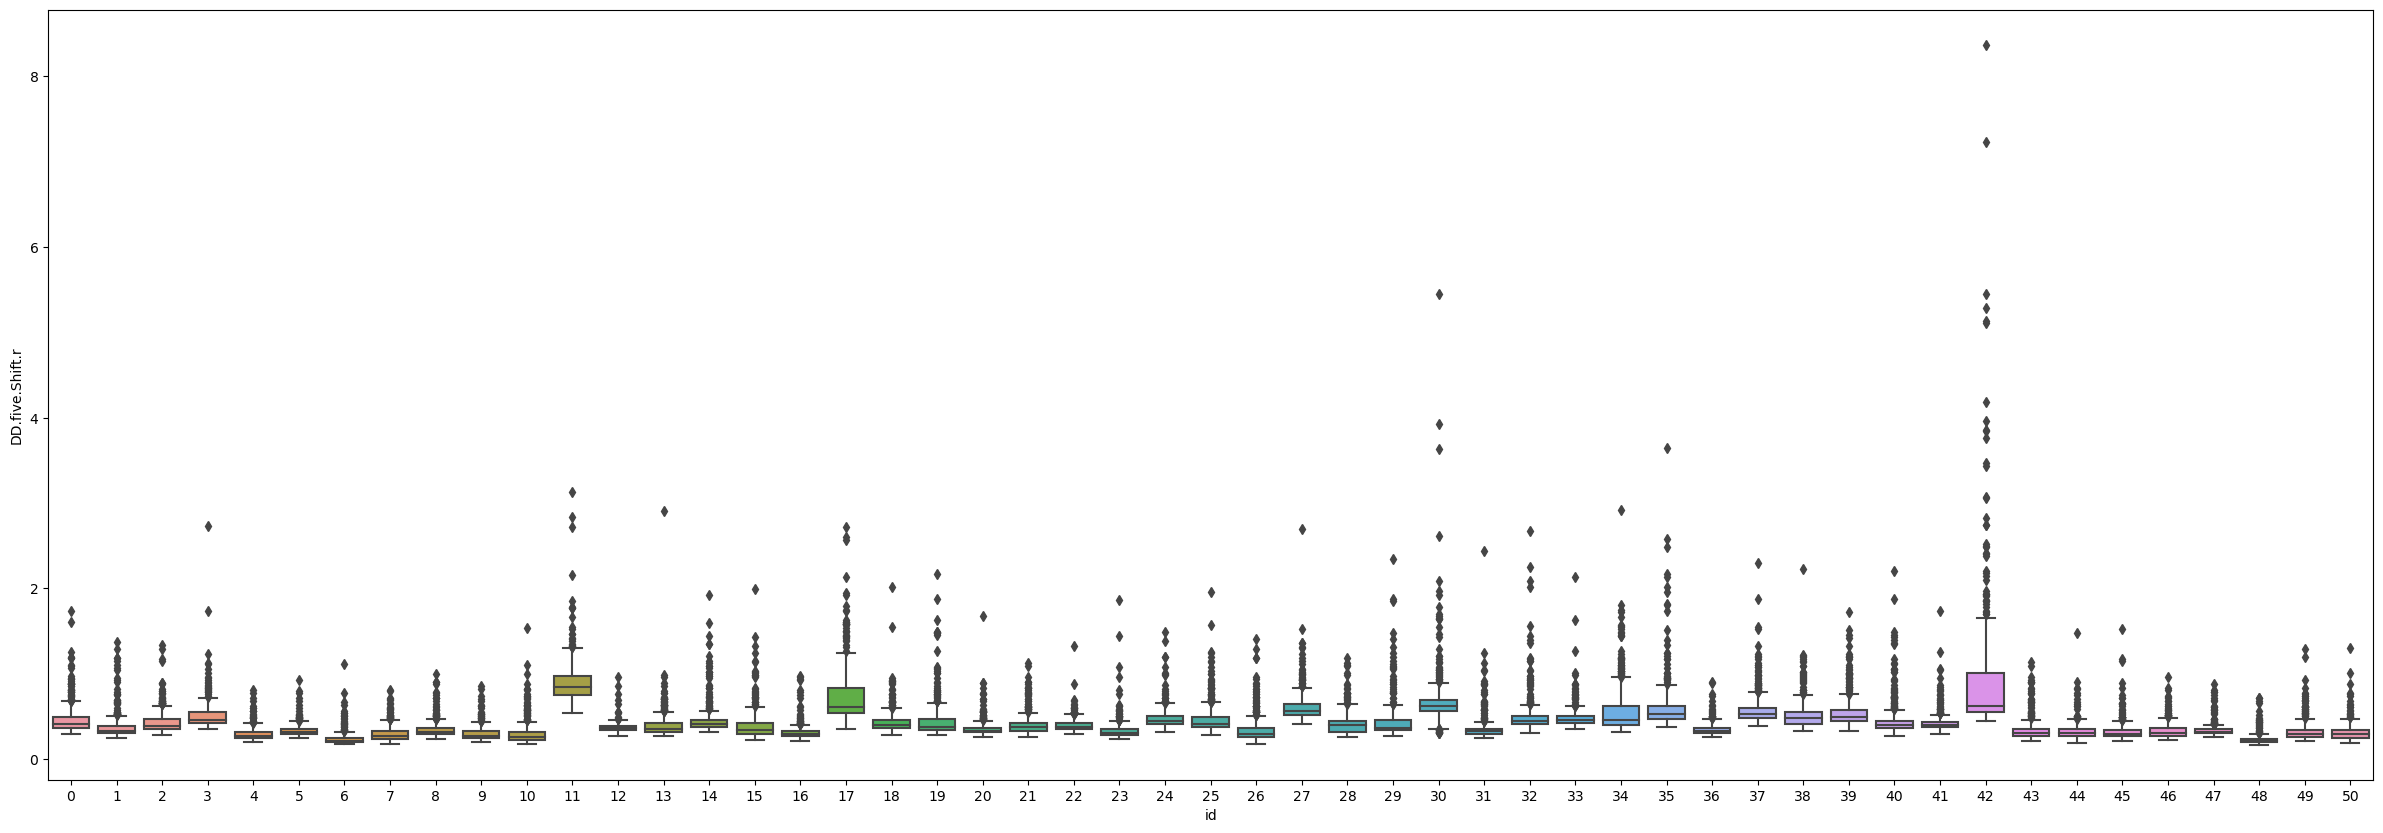

In [24]:
# plot box plot for 'DD.five.Shift.R' column
#increase the size of the plot
plt.figure(figsize=(30,10))

sns.boxplot(x='id', y='DD.five.Shift.r', data=df)
plt.show()


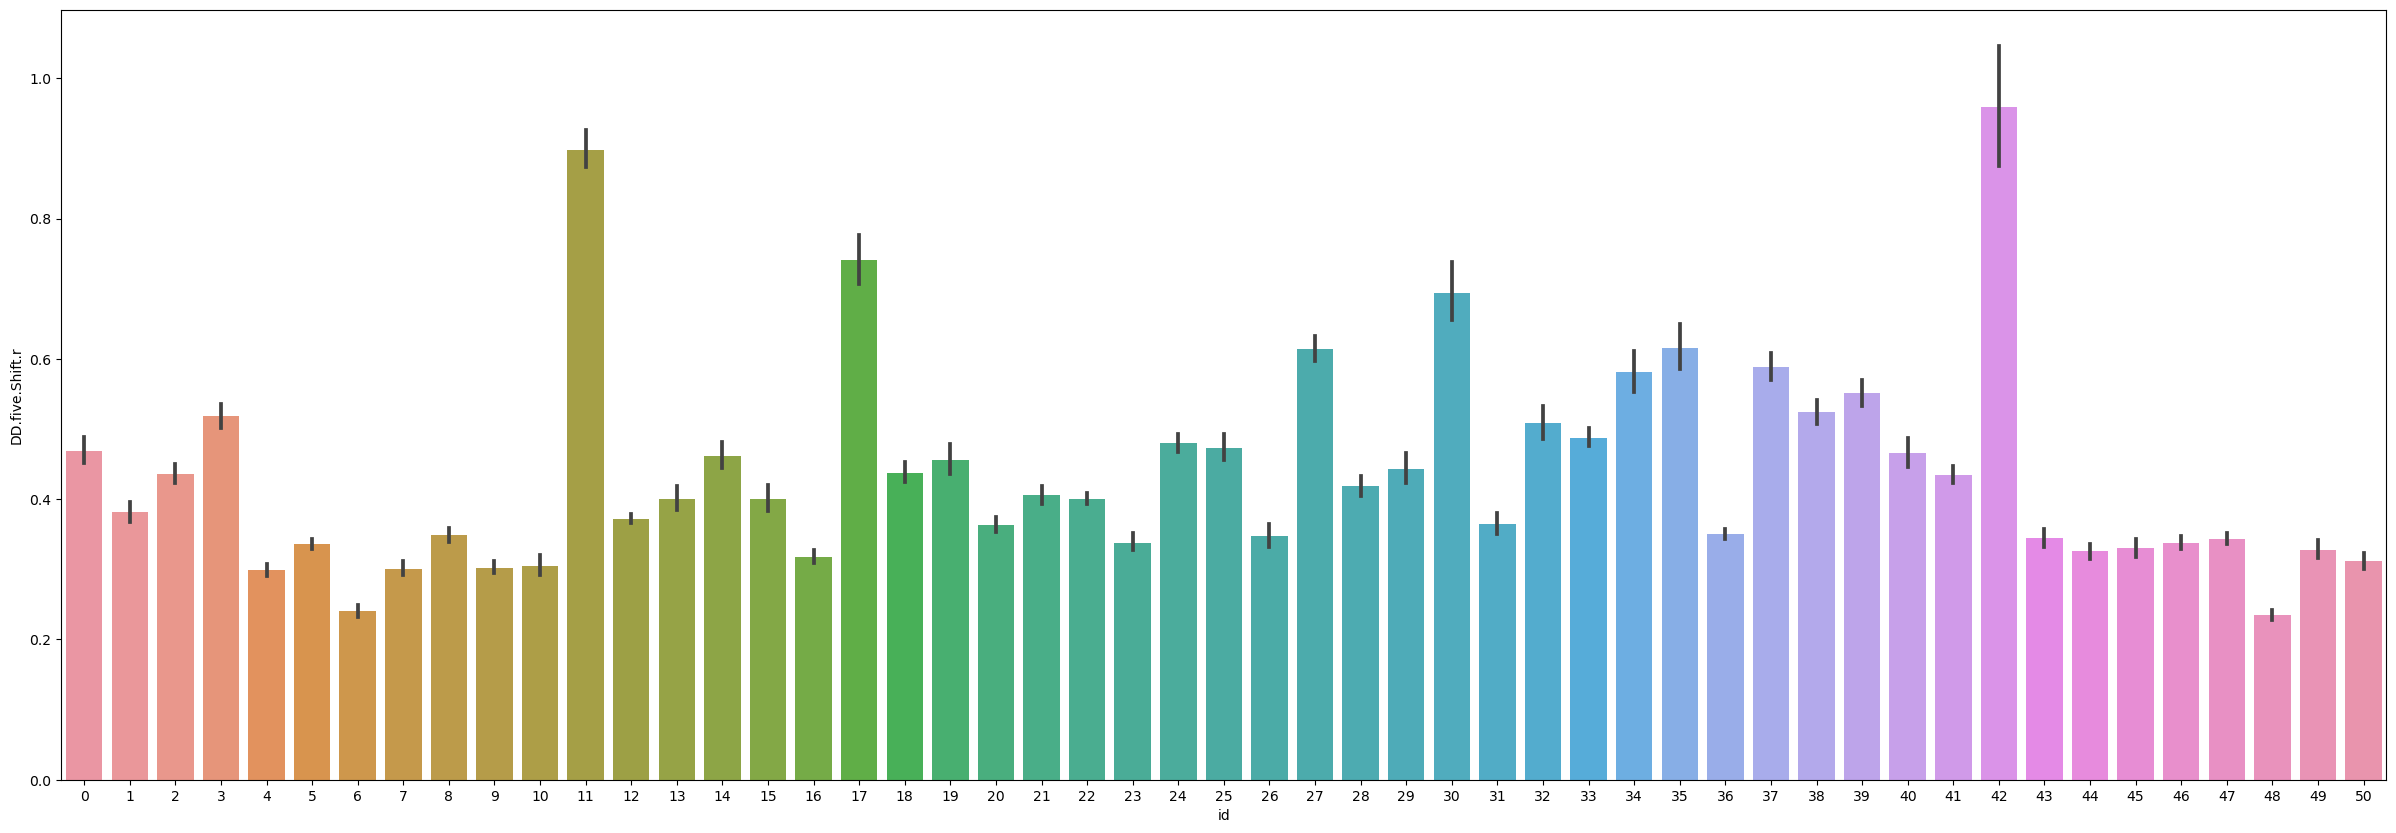

In [25]:
# plot box plot for 'DD.five.Shift.R' column
#increase the size of the plot
plt.figure(figsize=(30,10))
sns.barplot(x='id', y='DD.five.Shift.r', data=df)
plt.show()


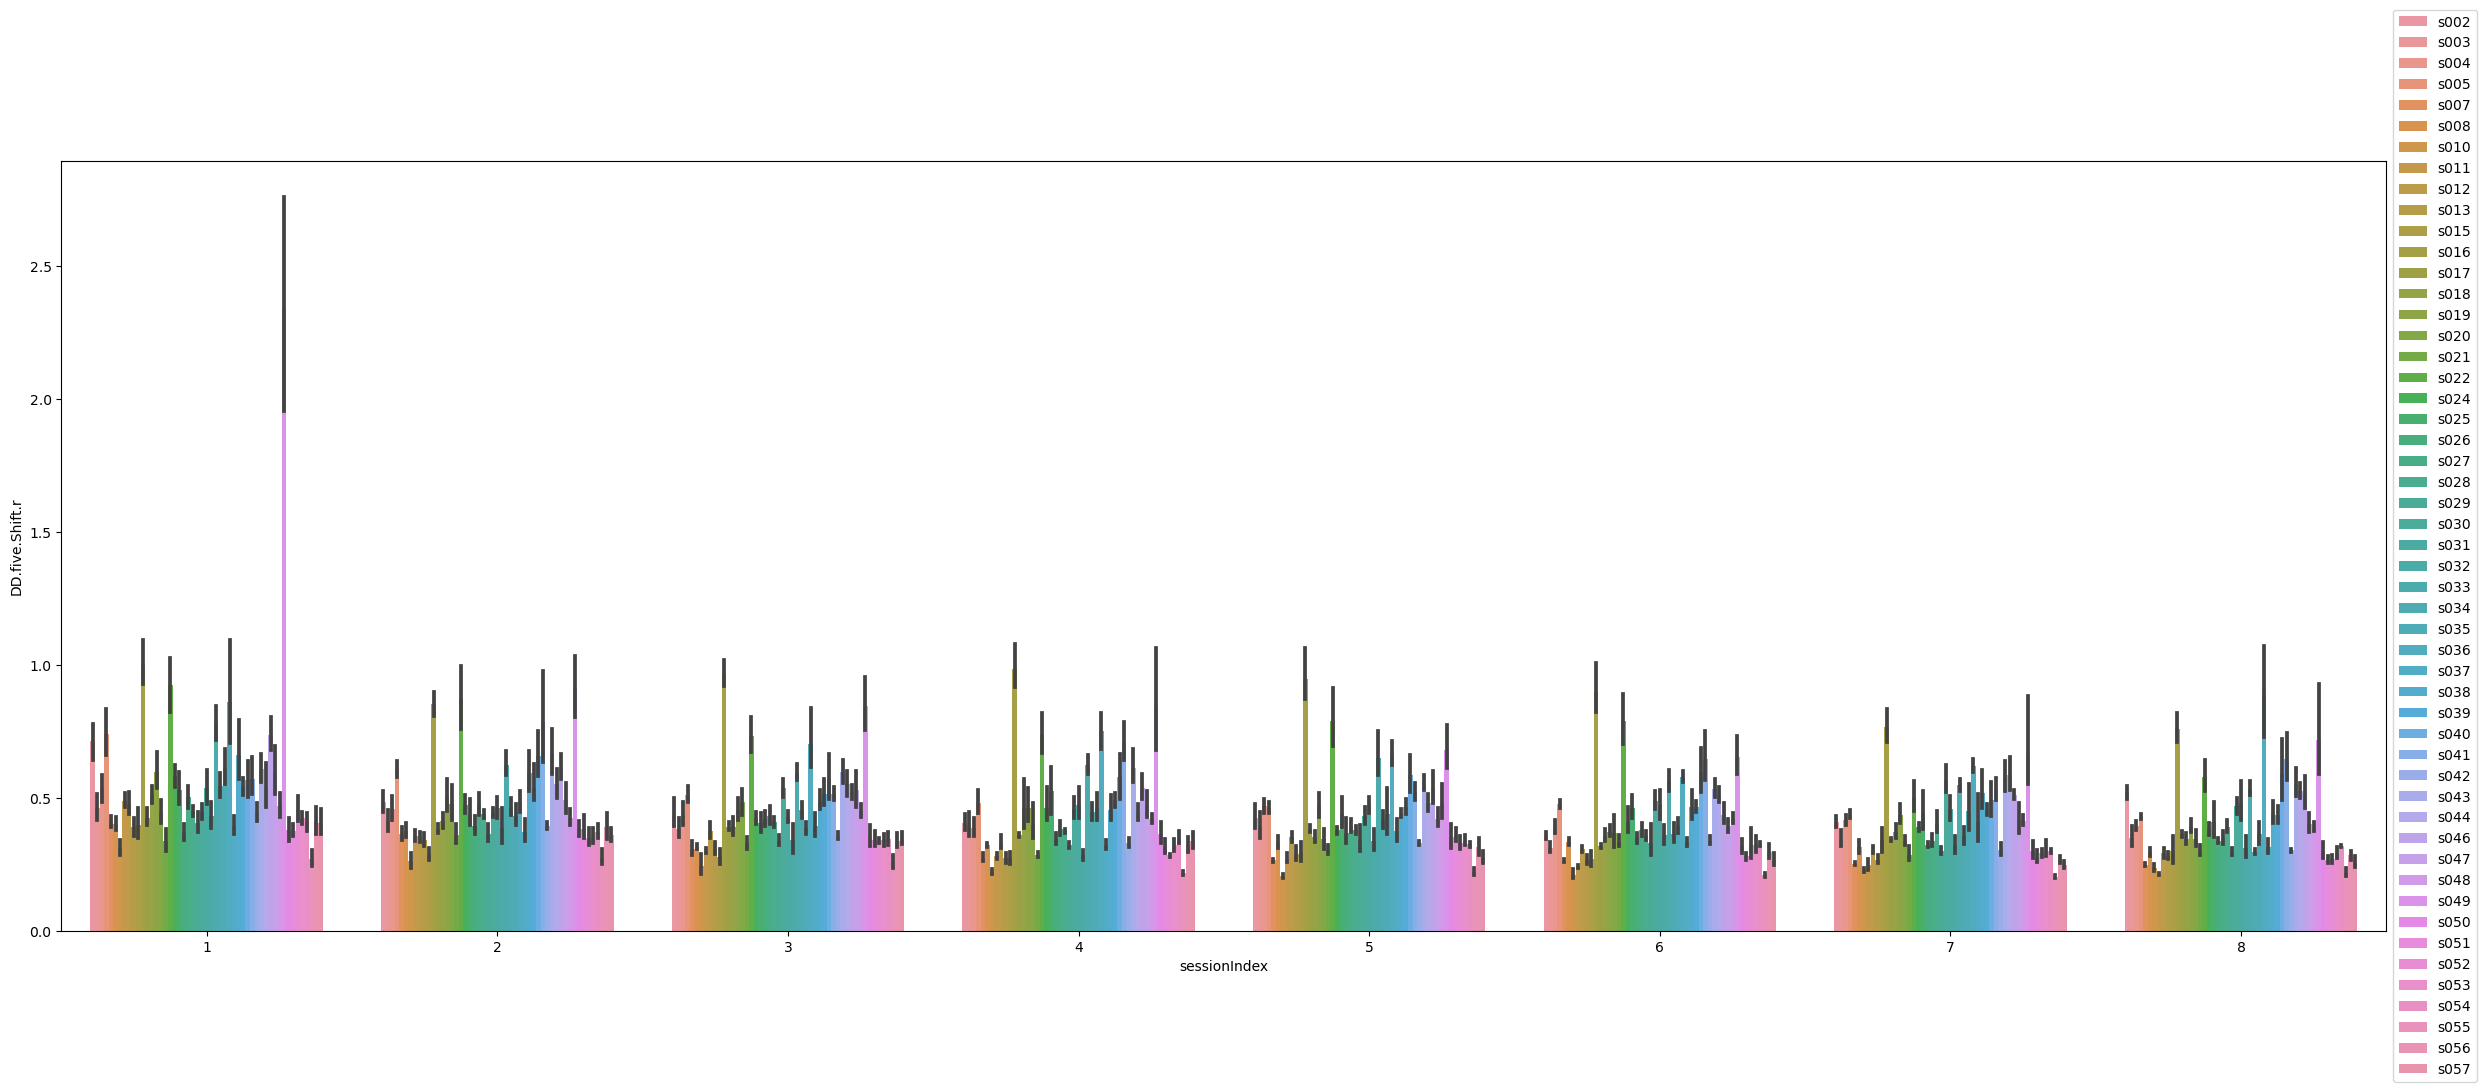

In [32]:
# plot box plot for 'DD.five.Shift.R' column
#increase the size of the plot
plt.figure(figsize=(30,10))
sns.barplot(x='sessionIndex', y='DD.five.Shift.r', data=df, hue='subject')
#plot legend horizontally
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.show()


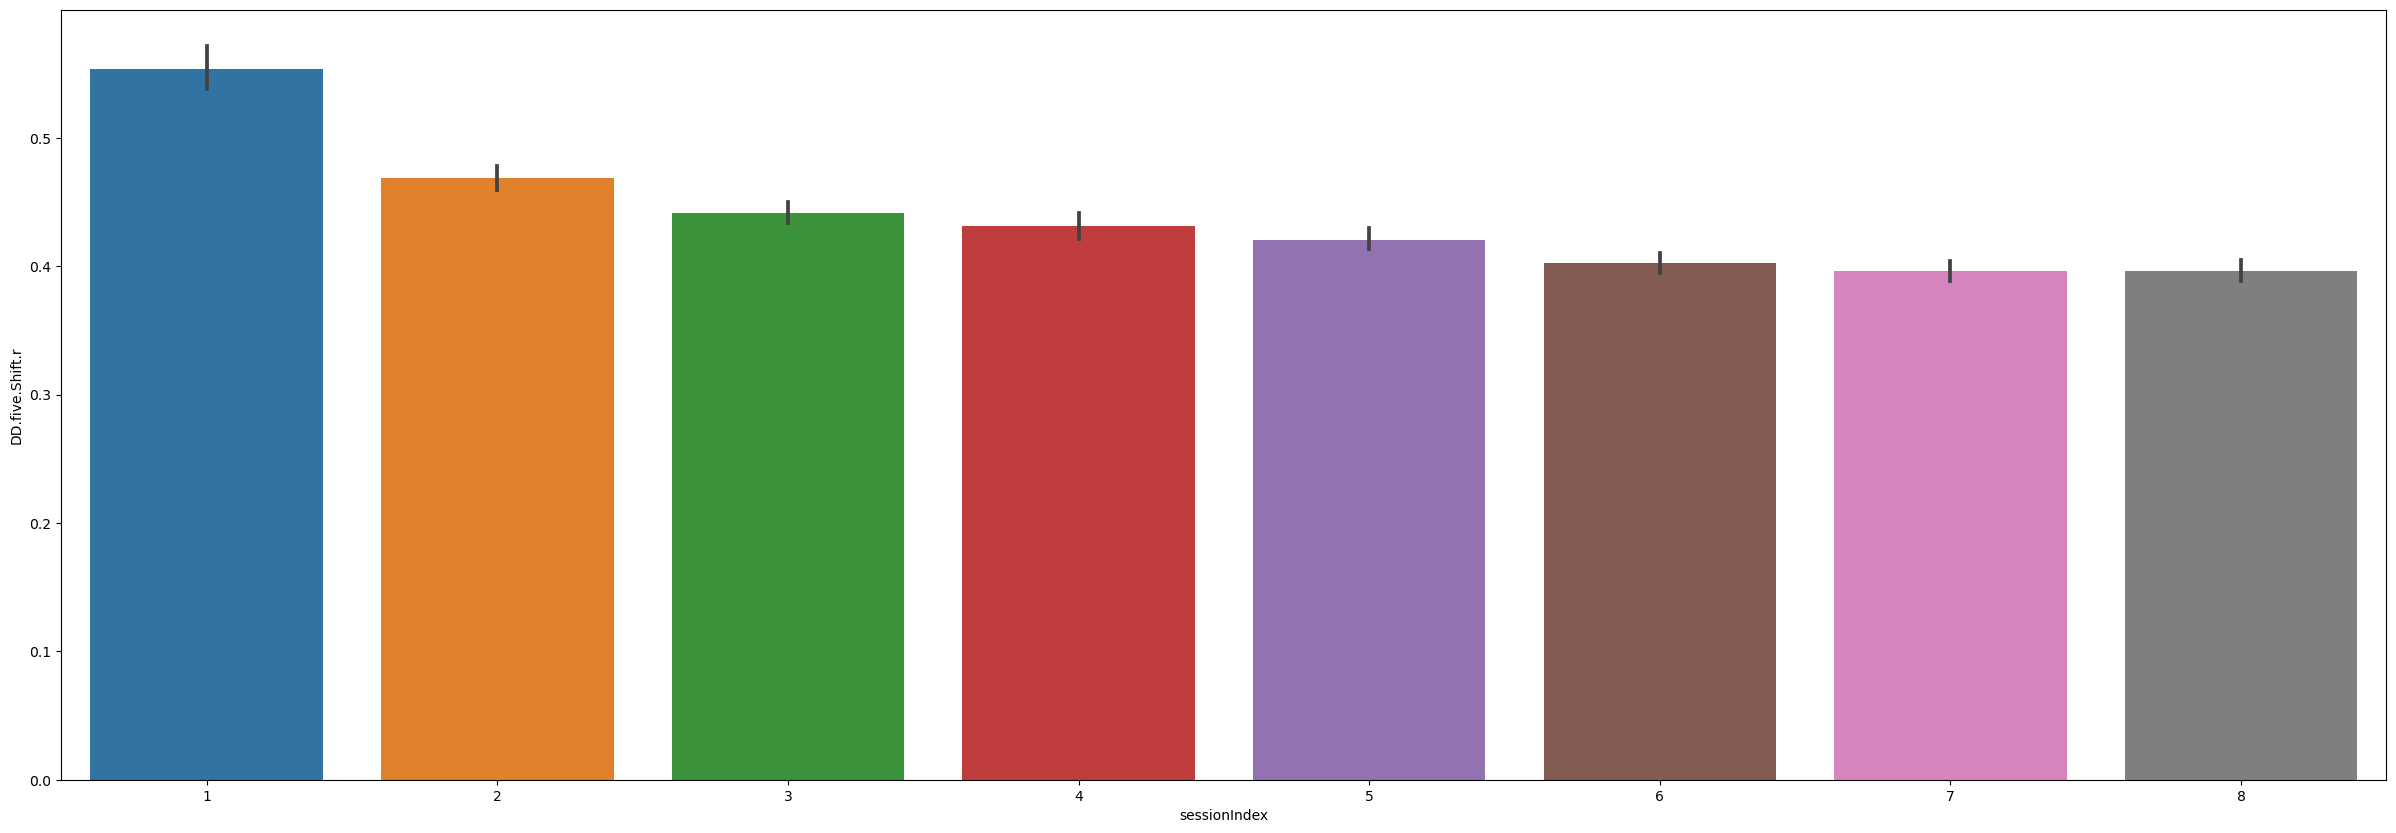

In [37]:
# plot box plot for 'DD.five.Shift.R' column
#increase the size of the plot
plt.figure(figsize=(30,10))
#plot average barplot of the column
sns.barplot(x='sessionIndex', y='DD.five.Shift.r', data=df, estimator=np.mean)
plt.show()


C:\Users\LG\AppData\Local\Temp\ipykernel_22896\351543063.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['H.Shift.r'])


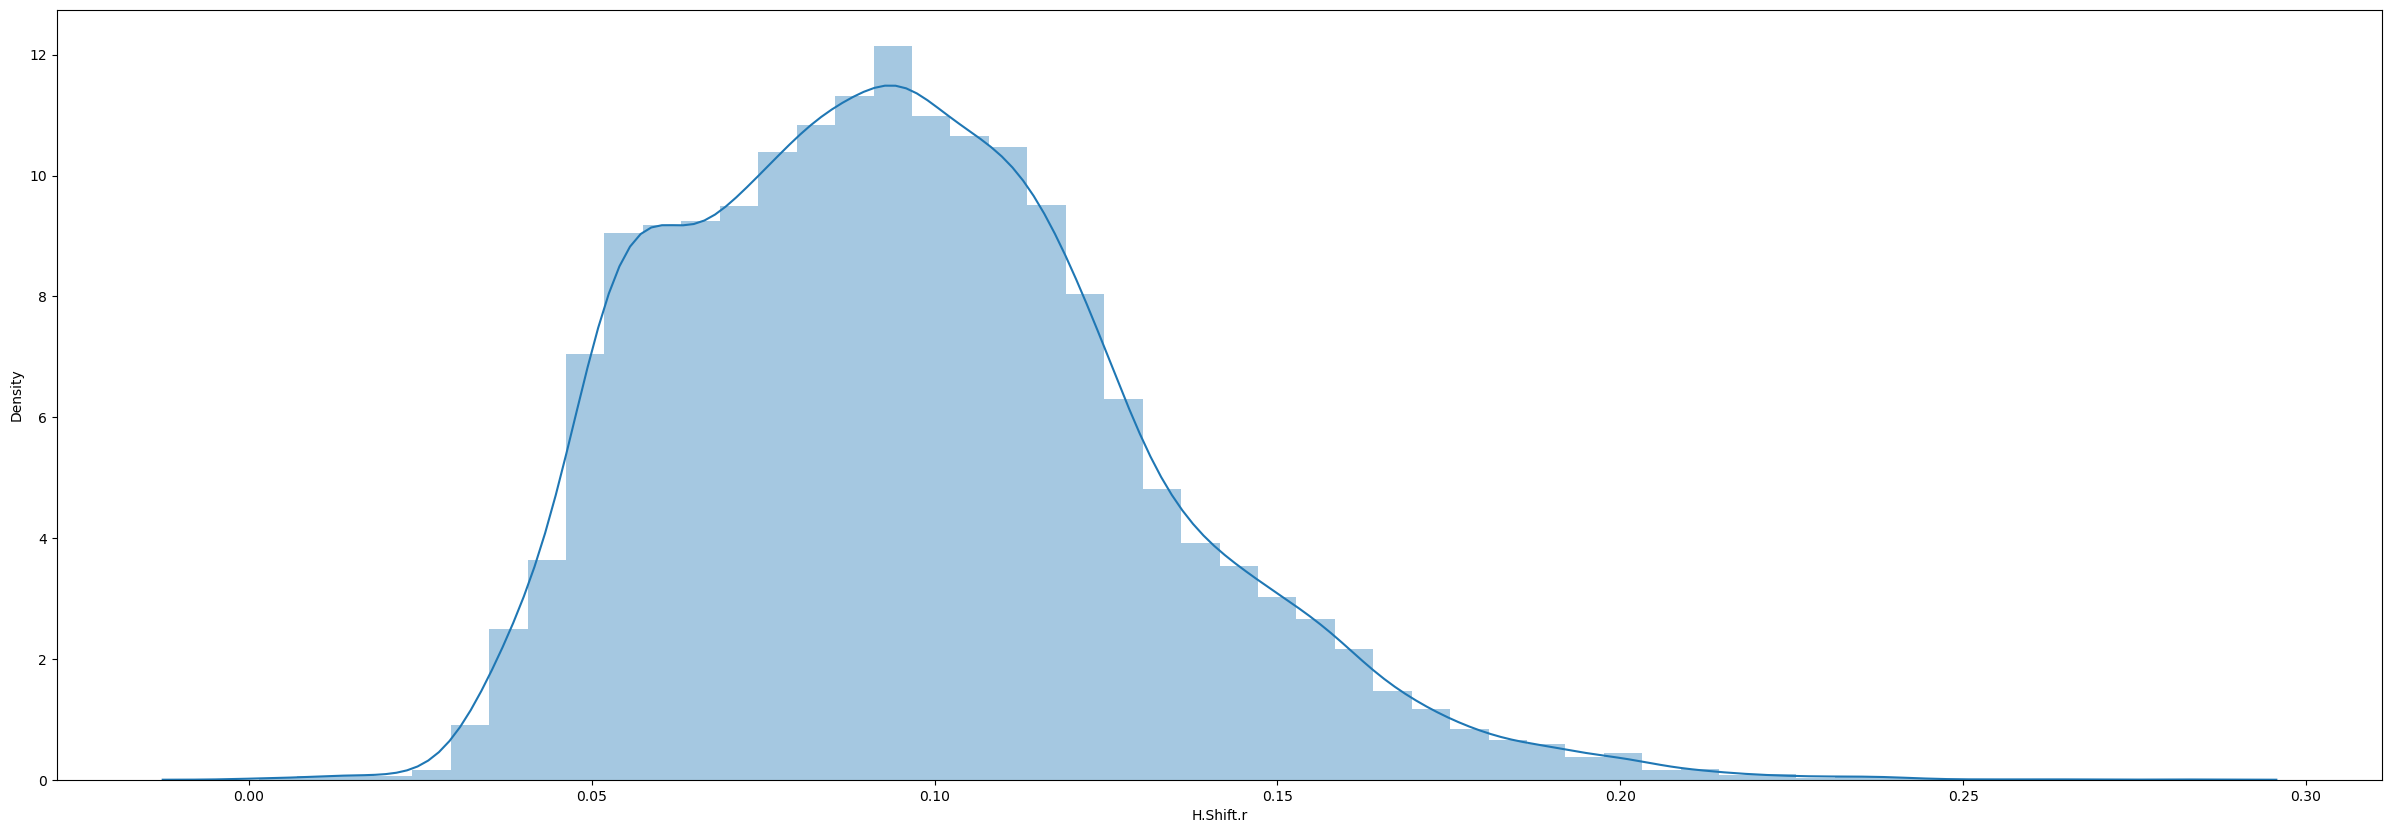

In [27]:
# plot distribution plot for 'DD.five.Shift.R' column
#increase the size of the plot
plt.figure(figsize=(30,10))
sns.distplot(df['H.Shift.r'])
plt.show()


In [82]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import visualkeras
# Split the data into training and testing sets

X = df.drop(['subject','id','sessionIndex','rep'],axis=1)
y = df['id']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)



In [83]:

# sns.pairplot(df, hue='id')
# plt.show

In [84]:
max(y)

50

In [85]:
y

0         0
1         0
2         0
3         0
4         0
         ..
20395    50
20396    50
20397    50
20398    50
20399    50
Name: id, Length: 20400, dtype: int8

In [86]:
# convert X_train and X_test to numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)



## More EDA
- Clustering how many distinct types of typist are there

In [87]:
X_train.shape

(13056, 31)

In [88]:
 # Utility function to visualize the outputs of PCA and t-SNE
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [89]:
from sklearn.decomposition import PCA
import time
time_start = time.time()

X_subset = X_train
pca = PCA(n_components=5)
pca_result = pca.fit_transform(X_subset)

print ('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.02783989906311035 seconds


In [90]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.43286034 0.13271546 0.11125664 0.08950503 0.0576611 ]


C:\Users\LG\AppData\Local\Temp\ipykernel_26588\1896694543.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 800x800 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-0.14038107934120586, -0.18791752099939935, '0'),
  Text(-0.4128855836274921, 0.0492442440761285, '1'),
  Text(-0.2201405594058441, -0.059974488482810215, '2'),
  Text(0.06691498828117366, 0.14621913108636939, '3'),
  Text(-0.4665663134405944, 0.016313598308093074, '4'),
  Text(-0.37425148820796883, -0.0009030650564932807, '5'),
  Text(-0.4477917958123495, 0.03374268723288007, '6'),
  Text(-0.5284566134778907, 0.029886709161122578, '7'),
  Text(-0.3526508154500584, -0.02521309408003914, '8'),
  Text(-0.4713045254793064, 0.005163263658664322, '9'),
  Text(-0.32182617463539953, -0.0931882049408524, '10'),
  Text(0.7456295448566935, -0.02926173854775328, '11'),
  Text(-0.3009213746515042, 0.012439957058200862, '12'),
  Text(-0.2673572696487767, -0.03653425255904541, '13'),
  Text(0.0863774438187756, 0.1552754297060635, '14'),
  Text(-0.32902283535707283, -0.022316624771904943, '15'),
  Text(-0.25776275439115687, 0.113428635160435

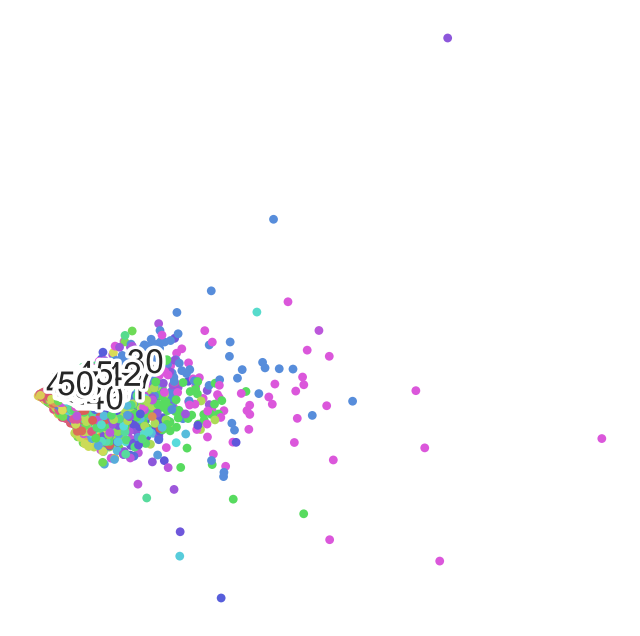

In [91]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

fashion_scatter(top_two_comp.values,y_train) # Visualizing the PCA output

c:\Users\LG\.conda\envs\gpu_env\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\LG\.conda\envs\gpu_env\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE done! Time elapsed: 124.1465675830841 seconds


C:\Users\LG\AppData\Local\Temp\ipykernel_26588\1896694543.py:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 800x800 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-38.11904, 4.430629, '0'),
  Text(41.76743, 41.305824, '1'),
  Text(6.697301, 7.779056, '2'),
  Text(42.612564, -10.624821, '3'),
  Text(10.229298, 61.321682, '4'),
  Text(17.687754, 31.314898, '5'),
  Text(-53.34886, 42.44314, '6'),
  Text(19.107483, 83.253845, '7'),
  Text(36.705963, 51.68637, '8'),
  Text(-20.279161, 60.402466, '9'),
  Text(-39.188828, 20.81485, '10'),
  Text(-7.7660866, -54.473293, '11'),
  Text(-19.893555, 33.462204, '12'),
  Text(24.547886, 12.474057, '13'),
  Text(61.339607, -33.37667, '14'),
  Text(11.111013, 17.895245, '15'),
  Text(-1.1950874, 30.038387, '16'),
  Text(12.593218, -62.485413, '17'),
  Text(-42.703445, -23.257017, '18'),
  Text(-23.36758, -32.55062, '19'),
  Text(11.133804, 17.908688, '20'),
  Text(-64.564896, -16.296162, '21'),
  Text(-42.4429, -11.19638, '22'),
  Text(4.012683, 51.13993, '23'),
  Text(-9.838294, -20.144836, '24'),
  Text(15.527186, -14.284241, '25'),
  Text(-21.242298

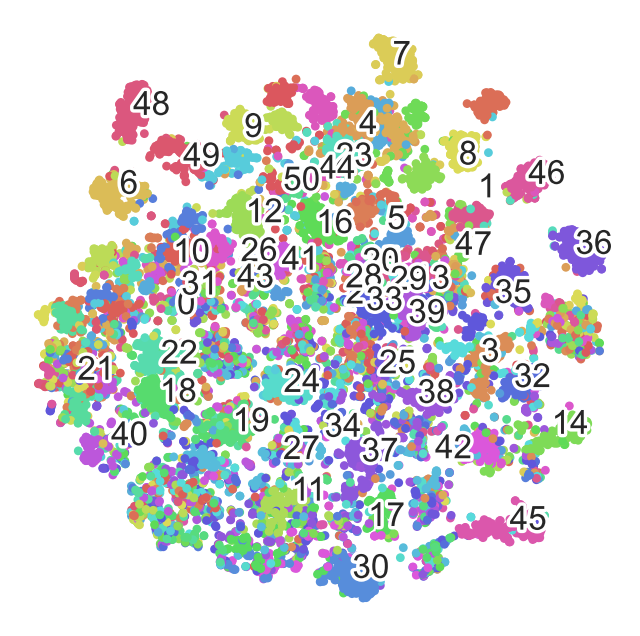

In [92]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=RS).fit_transform(X_subset)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
fashion_scatter(fashion_tsne, y_train)



In [93]:
y_train

array([46, 13, 42, ..., 46, 42, 40], dtype=int8)

In [94]:
# reshape the data to 3D

# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)


X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])


In [67]:
max(y)

50

In [95]:
def plot_accuracy_and_loss(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()



In [96]:
# Build LSTM model

model = Sequential()
model.add(LSTM(128,activation='relu',return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(max(y)+1, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

mc = ModelCheckpoint('Securythm.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=10)


model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), callbacks=[mc, early_stop])
model.summary()




Epoch 1/200
408/408 [==============================] - ETA: 0s - loss: 3.6974 - accuracy: 0.0482
Epoch 1: val_accuracy improved from -inf to 0.08364, saving model to Securythm.h5
408/408 [==============================] - 16s 19ms/step - loss: 3.6974 - accuracy: 0.0482 - val_loss: 3.2552 - val_accuracy: 0.0836
Epoch 2/200
408/408 [==============================] - ETA: 0s - loss: 3.1130 - accuracy: 0.1330
Epoch 2: val_accuracy improved from 0.08364 to 0.25705, saving model to Securythm.h5
408/408 [==============================] - 8s 19ms/step - loss: 3.1130 - accuracy: 0.1330 - val_loss: 2.6296 - val_accuracy: 0.2570
Epoch 3/200
407/408 [============================>.] - ETA: 0s - loss: 2.7007 - accuracy: 0.2151
Epoch 3: val_accuracy improved from 0.25705 to 0.34099, saving model to Securythm.h5
408/408 [==============================] - 8s 21ms/step - loss: 2.7004 - accuracy: 0.2149 - val_loss: 2.3032 - val_accuracy: 0.3410
Epoch 4/200
406/408 [============================>.] - ETA: 

In [97]:
test_loss , test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

128/128 [==============================] - 2s 8ms/step - loss: 0.3636 - accuracy: 0.9007
Test accuracy: 0.9007353186607361
Test loss: 0.3636281490325928


In [3]:
# load model
from keras.models import load_model

ScoresDF = pd.DataFrame(columns=['ModelName','TestAccuracy','TestLoss'])

#load model
model = load_model('Securythm.h5')


test_loss , test_acc = model.evaluate(X_test, y_test , batch_size=16)

ScoresDF = pd.concat([ScoresDF, pd.DataFrame({'ModelName':['Securythm.h5'],'TestAccuracy':[test_acc],'TestLoss':[test_loss]})], ignore_index=True)



NameError: name 'X_test' is not defined

In [98]:
# Build LSTM model

model = Sequential()
model.add(LSTM(256,activation='relu',return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128,activation='relu',return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(max(y)+1, activation='softmax' , kernel_regularizer=keras.regularizers.l2(0.01)))
opt = keras.optimizers.Adam(learning_rate=0.001, decay=1e-6)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

mc = ModelCheckpoint('model3.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=20)


model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), callbacks=[mc, early_stop])
model.summary()




Epoch 1/200
406/408 [============================>.] - ETA: 0s - loss: 3.8565 - accuracy: 0.0327
Epoch 1: val_accuracy improved from -inf to 0.07475, saving model to model3.h5
408/408 [==============================] - 12s 22ms/step - loss: 3.8539 - accuracy: 0.0328 - val_loss: 3.2348 - val_accuracy: 0.0748
Epoch 2/200
408/408 [==============================] - ETA: 0s - loss: 3.2663 - accuracy: 0.0776
Epoch 2: val_accuracy improved from 0.07475 to 0.11550, saving model to model3.h5
408/408 [==============================] - 12s 29ms/step - loss: 3.2663 - accuracy: 0.0776 - val_loss: 3.0991 - val_accuracy: 0.1155
Epoch 3/200
408/408 [==============================] - ETA: 0s - loss: 3.1664 - accuracy: 0.0972
Epoch 3: val_accuracy improved from 0.11550 to 0.11581, saving model to model3.h5
408/408 [==============================] - 15s 36ms/step - loss: 3.1664 - accuracy: 0.0972 - val_loss: 3.0259 - val_accuracy: 0.1158
Epoch 4/200
407/408 [============================>.] - ETA: 0s - lo

In [19]:
second_model = load_model('Securythm1.h5')
test_loss , test_acc = second_model.evaluate(X_test, y_test, batch_size=16)
ScoresDF = ScoresDF.append({'ModelName':'Second Model','TestAccuracy':test_acc,'TestLoss':test_loss},ignore_index=True)


255/255 [==============================] - 1s 2ms/step - loss: 5.0356 - accuracy: 0.8880


C:\Users\LG\AppData\Local\Temp\ipykernel_19504\3479034657.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ScoresDF = ScoresDF.append({'ModelName':'Second Model','TestAccuracy':test_acc,'TestLoss':test_loss},ignore_index=True)


In [21]:
second_model = load_model('model3.h5')
test_loss , test_acc = second_model.evaluate(X_test, y_test, batch_size=16)
ScoresDF = ScoresDF.append({'ModelName':'3rd Model','TestAccuracy':test_acc,'TestLoss':test_loss},ignore_index=True)
ScoresDF

255/255 [==============================] - 1s 2ms/step - loss: 0.7560 - accuracy: 0.8968


C:\Users\LG\AppData\Local\Temp\ipykernel_19504\2634910223.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ScoresDF = ScoresDF.append({'ModelName':'3rd Model','TestAccuracy':test_acc,'TestLoss':test_loss},ignore_index=True)


,ModelName,TestAccuracy,TestLoss
0,Securythm.h5,0.876961,0.923940
1,Second Model,0.887990,5.035567
2,3rd Model,0.896814,0.756044
3,3rd Model,0.896814,0.756044


In [99]:
# Build LSTM model lesser decay

model = Sequential()
model.add(LSTM(256,activation='relu',return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128,activation='relu',return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(max(y)+1, activation='softmax' , kernel_regularizer=keras.regularizers.l2(0.01)))
opt = keras.optimizers.Adam(learning_rate=0.001, decay=1e-5)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

mc = ModelCheckpoint('model4.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=20)


history=model.fit(X_train, y_train, epochs=400, validation_data=(X_val, y_val), callbacks=[mc, early_stop])
model.summary()




Epoch 1/400
408/408 [==============================] - ETA: 0s - loss: 3.9119 - accuracy: 0.0282
Epoch 1: val_accuracy improved from -inf to 0.06342, saving model to model4.h5
408/408 [==============================] - 14s 30ms/step - loss: 3.9119 - accuracy: 0.0282 - val_loss: 3.4253 - val_accuracy: 0.0634
Epoch 2/400
408/408 [==============================] - ETA: 0s - loss: 3.3657 - accuracy: 0.0780
Epoch 2: val_accuracy improved from 0.06342 to 0.15778, saving model to model4.h5
408/408 [==============================] - 13s 31ms/step - loss: 3.3657 - accuracy: 0.0780 - val_loss: 3.1134 - val_accuracy: 0.1578
Epoch 3/400
408/408 [==============================] - ETA: 0s - loss: 2.9997 - accuracy: 0.1481
Epoch 3: val_accuracy improved from 0.15778 to 0.21661, saving model to model4.h5
408/408 [==============================] - 14s 35ms/step - loss: 2.9997 - accuracy: 0.1481 - val_loss: 2.6717 - val_accuracy: 0.2166
Epoch 4/400
408/408 [==============================] - ETA: 0s - lo

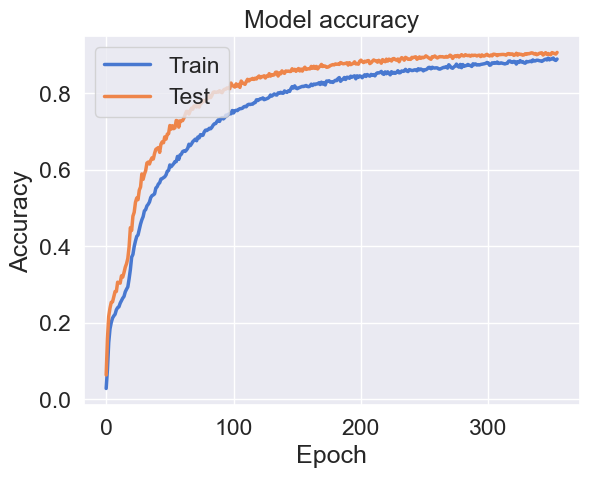

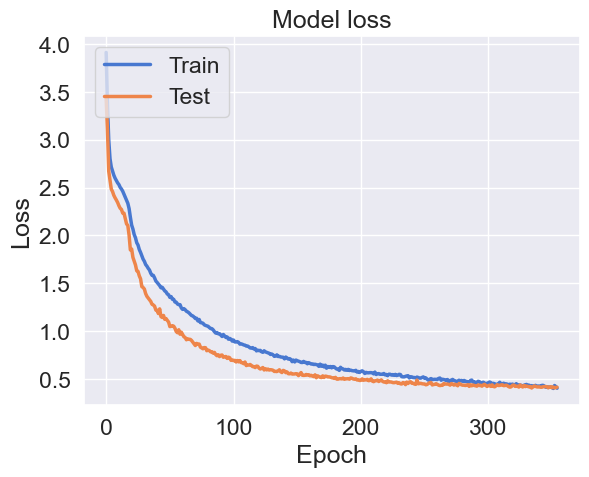

In [100]:
plot_accuracy_and_loss(history)

In [101]:
second_model = load_model('model4.h5')
test_loss , test_acc = second_model.evaluate(X_test, y_test, batch_size=16)
ScoresDF = ScoresDF.append({'ModelName':'3rd Model','TestAccuracy':test_acc,'TestLoss':test_loss},ignore_index=True)
ScoresDF

NameError: name 'load_model' is not defined

In [ ]:
# Build LSTM model lesser decay

model = Sequential()
model.add(LSTM(256,activation='relu',return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128,activation='relu',return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(64, activation='relu' ,return_sequences=True))
model.add(Dropout(0.15))

model.add(LSTM(32, activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(max(y)+1, activation='softmax' , kernel_regularizer=keras.regularizers.l2(0.01)))
opt = keras.optimizers.Adam(learning_rate=0.001, decay=1e-5)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

mc = ModelCheckpoint('model4.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=20)


history=model.fit(X_train, y_train, epochs=400, validation_data=(X_val, y_val), callbacks=[mc, early_stop])
model.summary()




Epoch 1/400
399/408 [============================>.] - ETA: 0s - loss: 4.0130 - accuracy: 0.0147
Epoch 1: val_accuracy improved from -inf to 0.01961, saving model to model4.h5
408/408 [==============================] - 6s 7ms/step - loss: 4.0112 - accuracy: 0.0145 - val_loss: 3.9328 - val_accuracy: 0.0196
Epoch 2/400
398/408 [============================>.] - ETA: 0s - loss: 3.9325 - accuracy: 0.0160
Epoch 2: val_accuracy did not improve from 0.01961
408/408 [==============================] - 2s 5ms/step - loss: 3.9325 - accuracy: 0.0157 - val_loss: 3.9318 - val_accuracy: 0.0196
Epoch 3/400
406/408 [============================>.] - ETA: 0s - loss: 3.9324 - accuracy: 0.0162
Epoch 3: val_accuracy did not improve from 0.01961
408/408 [==============================] - 2s 5ms/step - loss: 3.9324 - accuracy: 0.0161 - val_loss: 3.9318 - val_accuracy: 0.0196
Epoch 4/400
398/408 [============================>.] - ETA: 0s - loss: 3.8200 - accuracy: 0.0255
Epoch 4: val_accuracy improved from 0.

In [ ]:
second_model = load_model('model4.h5')
test_loss , test_acc = second_model.evaluate(X_test, y_test, batch_size=16)
ScoresDF = ScoresDF.append({'ModelName':'5th Model','TestAccuracy':test_acc,'TestLoss':test_loss},ignore_index=True)
ScoresDF

255/255 [==============================] - 1s 2ms/step - loss: 0.7481 - accuracy: 0.8934


C:\Users\LG\AppData\Local\Temp\ipykernel_25472\3993139904.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ScoresDF = ScoresDF.append({'ModelName':'5th Model','TestAccuracy':test_acc,'TestLoss':test_loss},ignore_index=True)


,ModelName,TestAccuracy,TestLoss
0,3rd Model,0.887745,0.615354
1,5th Model,0.893382,0.748108


In [ ]:
# Build LSTM model lesser decay

model = Sequential()
model.add(LSTM(256,activation='relu',return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128,activation='relu',return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(64, activation='relu' ,return_sequences=True))
model.add(Dropout(0.15))

model.add(LSTM(32, activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(max(y)+1, activation='softmax' , kernel_regularizer=keras.regularizers.l2(0.01)))
opt = keras.optimizers.Adam(learning_rate=0.001, decay=1e-5)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

mc = ModelCheckpoint('model4.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=20)


history=model.fit(X_train_scaled, y_train, epochs=400, validation_data=(X_val_scaled, y_val), callbacks=[mc, early_stop])
model.summary()




Epoch 1/400


ValueError: in user code:

    File "c:\Users\LG\.conda\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\LG\.conda\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\LG\.conda\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\LG\.conda\envs\gpu_env\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\LG\.conda\envs\gpu_env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\LG\.conda\envs\gpu_env\lib\site-packages\keras\engine\input_spec.py", line 232, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_4" "                 f"(type Sequential).
    
    Input 0 of layer "lstm_14" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (32, 31)
    
    Call arguments received by layer "sequential_4" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(32, 31), dtype=float32)
      • training=True
      • mask=None


# flow

## Intro 
- no code 
- no images 
- almost done

## Related works 
- HMM( hidden markov model)
- SVM ( support vector machine)
- KNN ( k nearest neighbor)
just read and kinda understand or maybe plot similar clusters

## Methodology 
- what you will be using 
- dataset provided by who 
- background staff about data collected

## EDA (code and images)
- visualizing data 
- distribution
- outliers
- clustering analysis

## Scaling? (coding)
- min max scaler?
- formula for min max scaler
- why min max scaler?

## Model ( model with vs without scaling)
- visualizations of what LSTM models are
- what is LSTM ( can use cross val score )
- what is GRU
- what is RNN
- Model accuracy

can person a mimic person b ( important)
Results Miss/False Alarm Rate (important)

## Conclusion
- what you learned
- what you would do differently in the future
- Thanking people who helped you
